## Importing all the required libraries

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split

## Loading the datafiles

**Mount the gdrive**

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Specify the path to your input folder and target Excel file
input_folder_path = "/content/gdrive/MyDrive/BTP/New_data"
input_files = [os.path.join(input_folder_path, file) for file in os.listdir(input_folder_path) if file.endswith(".txt")]
target_excel_path = "/content/gdrive/MyDrive/BTP/NLO_OR_NLR.xlsx"
target_df = pd.read_excel(target_excel_path)

In [36]:
# Assuming your Excel file has a column named "Target" for the target values
targets = target_df["Target(in micro cm/W)"].values
def load_data_from_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Assuming the data is tab-separated
    data = [float(line.strip().split('\t')[1]) for line in lines]
    return data
# Step 4: Load and preprocess input data from text files
input_data = [load_data_from_text_file(file) for file in input_files]
# Step 2: Convert input_data to PyTorch tensors
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)
# Step 3: Split the dataset into training and validation sets
# input_train, input_val, target_train, target_val = train_test_split(input_data_tensor, targets, test_size=0, random_state=42)

In [37]:
input_data_tensor.shape

torch.Size([2, 100])

In [32]:
input_data_tensor.dtype

torch.float32

## DNN Architecture:

In [19]:
# Define your neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## set up the params

In [38]:
# Define hyperparameters
input_size =100 #len(train_dataset[0][0]) #len(train_dataset[0][0])  # Number of input features
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons

# Instantiate the model
model = RegressionModel(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## training and validating the model

In [39]:

# Training loop
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(input_data_tensor)

    # Here you would need the actual target values for training

    # For demonstration purposes, assuming target_values is a tensor of the same shape as outputs
    target_values = torch.tensor([7.2, 5.1], dtype=torch.float32).view(-1, 1)

    # Compute the loss
    loss = criterion(outputs, target_values)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# After training, you can use the model for predictions
with torch.no_grad():
    predicted_values = model(input_data_tensor)
    print(f'Predicted Values: {predicted_values.view(-1).tolist()}')

Epoch [100/1000], Loss: 0.0004
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Predicted Values: [7.199999809265137, 5.099999904632568]


## Testing the model

In [40]:
# printing mse values to the above model

from sklearn.metrics import mean_squared_error
with torch.no_grad():
  predicted_values = model(input_data_tensor)
  mse = mean_squared_error(targets, predicted_values.view(-1).tolist())
  print(f'MSE: {mse}')


MSE: 2.2737367544323207e-14


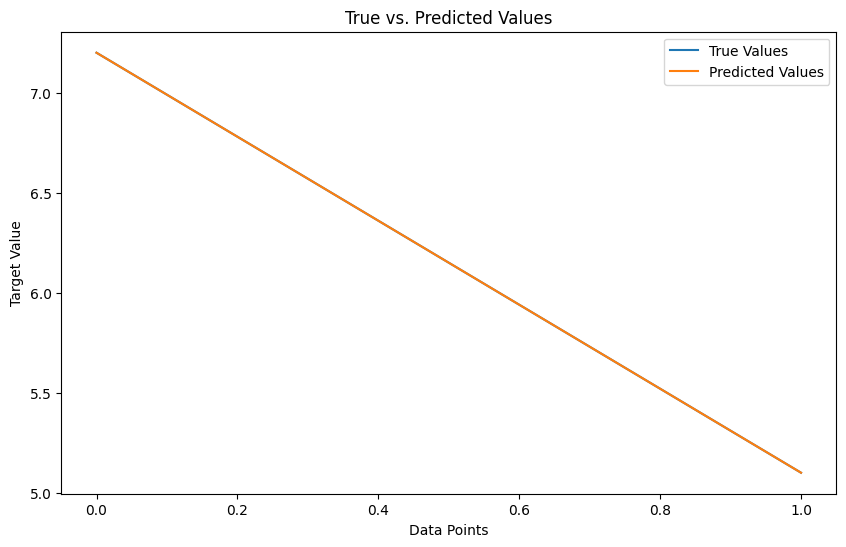

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(targets, label="True Values")
plt.plot(predicted_values.view(-1).tolist(), label="Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Target Value")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()


In [ ]:
# Assuming your Excel file has a column named "Target" for the target values
targets = target_df["Target(in micro cm/W)"].values
def load_data_from_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Assuming the data is tab-separated
    data = [float(line.strip().split('\t')[1]) for line in lines]
    return data
# Step 4: Load and preprocess input data from text files
input_data = [load_data_from_text_file(file) for file in input_files]
# Step 2: Convert input_data to PyTorch tensors
input_data_tensor = torch.tensor(input_data, dtype=torch.float32)

In [42]:
input_folder_path = "/content/gdrive/MyDrive/BTP/CA_DATASET"
input_files_test = [os.path.join(input_folder_path, file) for file in os.listdir(input_folder_path) if file.endswith(".txt")]
target_excel_path = "/content/gdrive/MyDrive/BTP/DEMO_VALUES.xlsx"
target_df = pd.read_excel(target_excel_path)

In [46]:
targets_new = target_df["targets"].values
def load_data_from_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    # Assuming the data is tab-separated
    data = [float(line.strip().split('\t')[1]) for line in lines]
    return data
# Step 4: Load and preprocess input data from text files
input_data_test = [load_data_from_text_file(file) for file in input_files_test]
# Step 2: Convert input_data to PyTorch tensors
input_data_tensor_test = torch.tensor(input_data_test, dtype=torch.float32)

In [44]:
# the model for predictions
with torch.no_grad():
    predicted_values = model(input_data_tensor_test)
    print(f'Predicted Values: {predicted_values.view(-1).tolist()}')

Predicted Values: [2.8032381534576416, 2.586540699005127, 3.131495714187622, 2.588557720184326, 3.2000234127044678, 2.90932035446167]


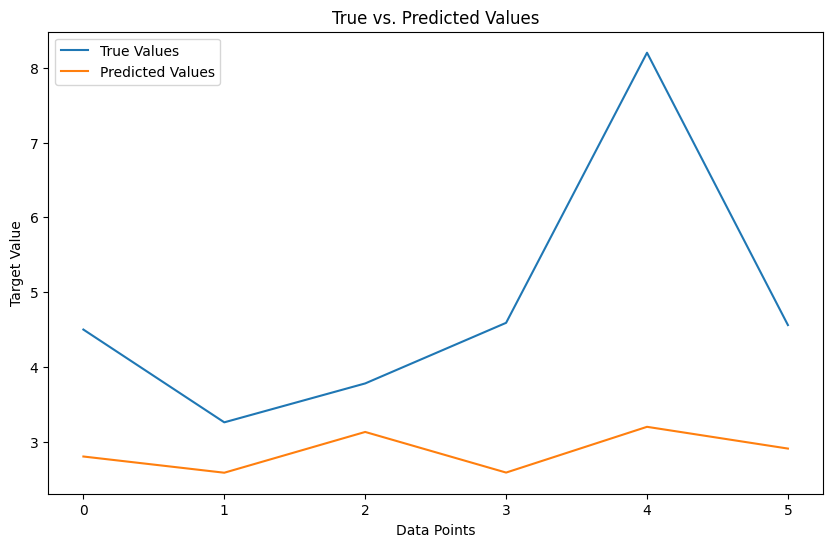

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(targets_new, label="True Values")
plt.plot(predicted_values.view(-1).tolist(), label="Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Target Value")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

## further for training the model with batch_size

## dataloaders for the future references

In [55]:
# # Step 4: Create a custom PyTorch dataset class
class MyDataset(Dataset):
    def __init__(self, input_data_tensor, targets, transform=None):
        self.input_data_tensor = input_data_tensor
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.input_data_tensor)

    def __getitem__(self, idx):
        # Load input file
        input_data = self.input_data_tensor[idx]
        # with open(input_file_path, 'r') as file:
        #     input_data = file.read()
        # Load target
        target = self.targets[idx]

        # Apply any necessary transformations
        if self.transform:
            input_data = self.transform(input_data)

        return input_data, target

In [68]:


# # Define the transformations
# transform = transforms.Compose([
#     transforms.ToTensor(),  # Convert data to PyTorch tensors
#     # transforms.Normalize((0.5,), (0.5,)),  # Normalize the data
#     # transforms.RandomHorizontalFlip(),  # Randomly flip the data horizontally
#     # transforms.RandomRotation(10),  # Randomly rotate the data
# ])



# Create a new dataset using the transformed data
transformed_dataset = MyDataset(input_data_tensor=input_data_tensor_test, targets=targets_new)




In [64]:
transformed_dataset.targets

array([4.5 , 3.26, 3.78, 4.59, 8.2 , 4.56])

In [69]:
# prompt: create a trainloader for the above dataset

batch_size = 2
train_loader = DataLoader(dataset=transformed_dataset, batch_size=batch_size, shuffle=True)


In [70]:
# Define hyperparameters
input_size =100 #len(train_dataset[0][0]) #len(train_dataset[0][0])  # Number of input features
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1  # Number of output neurons

# Instantiate the model
model = RegressionModel(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [79]:
# prompt: I want to check the what are the targets in train_loader

for batch in train_loader:
  inputs, targets = batch
  print(targets)
  break


tensor([4.5600, 8.2000], dtype=torch.float64)


In [82]:
# prompt: make the above into the float64 into float32 tensor target

# Assuming `targets` is a tensor of type float64
targets = targets.float()

# Convert the targets tensor to float32
targets = targets.to(torch.float32)


[4.56, 8.2]

In [81]:
# prompt: make them into a list

my_list = list(targets)
my_list

[tensor(4.5600, dtype=torch.float64), tensor(8.2000, dtype=torch.float64)]

In [87]:

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train the model for a certain number of epochs
num_epochs = 1000

for epoch in range(num_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        targets = targets.float()

        # Convert the targets tensor to float32
        target_values = targets.to(torch.float32).view(-1,1)
        # target_values = torch.tensor(target, dtype=torch.float32).view(-1, 1)
        loss = criterion(outputs, target_values)

        # Backpropagate the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss every 100 iterations
        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {loss.item():.4f}')

## saving the model

In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'trained_model.pt')